In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sympy import lambdify, diff, exp, latex
from matplotlib.colors import LinearSegmentedColormap
from sympy.abc import x, y
import seaborn as sns

### colormap
返回颜色映射名称

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

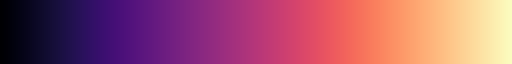

In [8]:
print(plt.colormaps())
print(len(plt.colormaps()))

c=plt.get_cmap('magma')
print(type(c))
c

In [9]:
# 获取colormap的颜色映射对应的值
inferno=plt.get_cmap('inferno')
value = np.linspace(0,1,11)

color_value=inferno(value)

print(color_value)

[[1.46200e-03 4.66000e-04 1.38660e-02 1.00000e+00]
 [8.74110e-02 4.45560e-02 2.24813e-01 1.00000e+00]
 [2.58234e-01 3.85710e-02 4.06485e-01 1.00000e+00]
 [4.16331e-01 9.02030e-02 4.32943e-01 1.00000e+00]
 [5.78304e-01 1.48039e-01 4.04411e-01 1.00000e+00]
 [7.35683e-01 2.15906e-01 3.30245e-01 1.00000e+00]
 [8.65006e-01 3.16822e-01 2.26055e-01 1.00000e+00]
 [9.54506e-01 4.68744e-01 9.98740e-02 1.00000e+00]
 [9.87622e-01 6.45320e-01 3.98860e-02 1.00000e+00]
 [9.64394e-01 8.43848e-01 2.73391e-01 1.00000e+00]
 [9.88362e-01 9.98364e-01 6.44924e-01 1.00000e+00]]


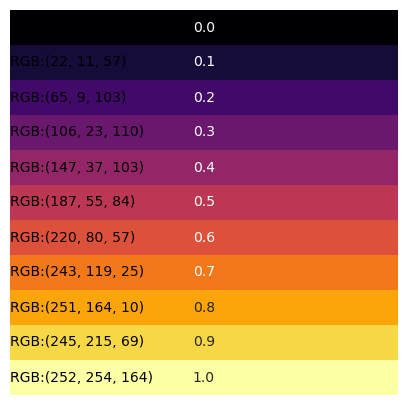

In [18]:
color_map=plt.get_cmap('inferno')
# reshape变成[[],[]]
data=np.round(np.linspace(0,1,11).reshape(-1,1),1)

fig,ax=plt.subplots(figsize=(5,5))

sns.heatmap(data=data,ax=ax,cmap=color_map,cbar=False,
            fmt='',annot=True,xticklabels=False,yticklabels=False)


for i,value in enumerate(data):
    rgba_color=color_map(value[0])
    rgb_color=tuple(int(255*c) for c in rgba_color[:3])

    ax.text(0,i+0.5,f'RGB:{rgb_color}',color='black'
            ,ha='left',va='center')

<Axes: >

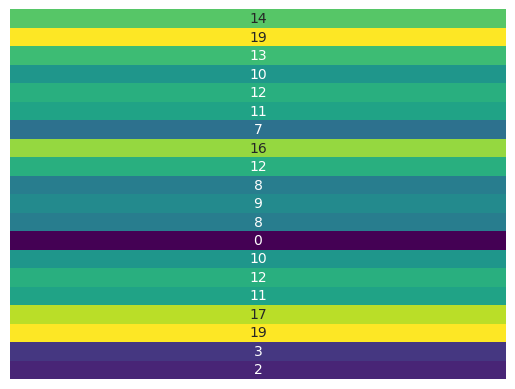

In [26]:
from matplotlib.colors import Normalize
random_value=np.random.randint(low=0,high=20,size=20)
# 将随机数映射到[0,1]
norm=Normalize(random_value.min(),random_value.max())
norm_value=norm(random_value)

color_map=plt.get_cmap('viridis')
# annotate 备注
sns.heatmap(data=random_value.reshape(-1,1),cmap=color_map
            ,xticklabels=False,yticklabels=False,cbar=False,annot=True)

### 色谱绘制三维网格曲面

In [5]:
#数据
num=301

x_array = np.linspace(-3,3,num)
y_array = np.linspace(-3,3,num)
xx,yy = np.meshgrid(x_array,y_array)

f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 
f_xy_fcn=lambdify((x,y),f_xy)

ff=f_xy_fcn(xx,yy)


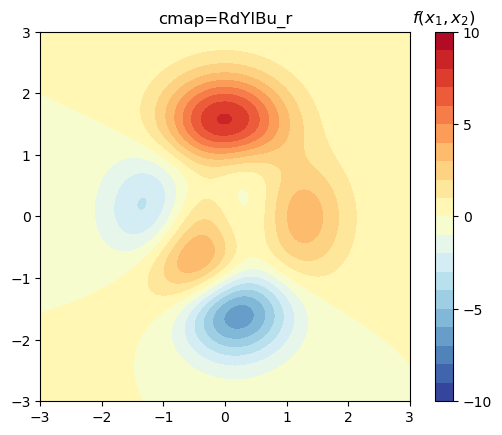

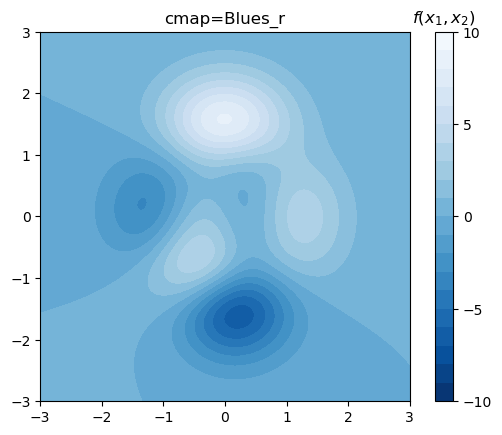

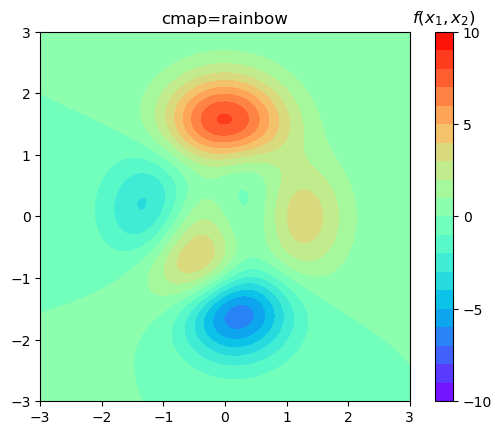

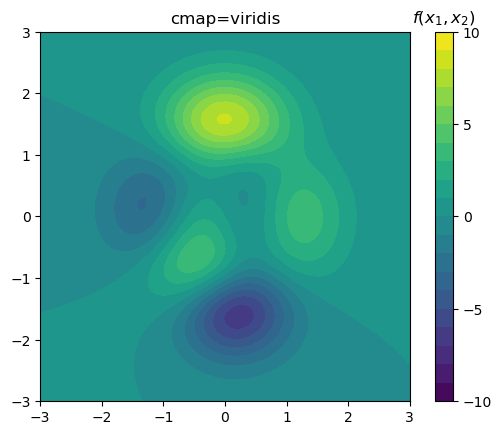

In [34]:
cmap_arr=['RdYlBu_r', 'Blues_r', 'rainbow', 'viridis']

levels=np.linspace(-10,10,21)
for cmap in cmap_arr:
    fig,ax=plt.subplots()
    color_bar=ax.contourf(xx,yy,ff,levels=levels,cmap=cmap)
    
    cbar=fig.colorbar(color_bar,ax=ax)
    cbar.set_ticks([-10,-5,0,5,10])
    cbar.ax.set_title('$f(x_1,x_2)$')

    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlim(xx.min(),xx.max())

    # ax.set_box_aspect(1)
    plt.gca().set_aspect('equal',adjustable='box')
    ax.set_title('cmap='+cmap)

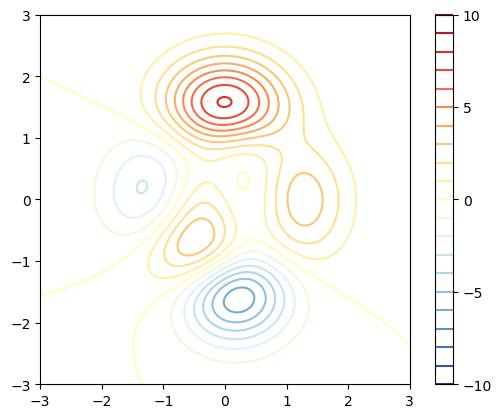

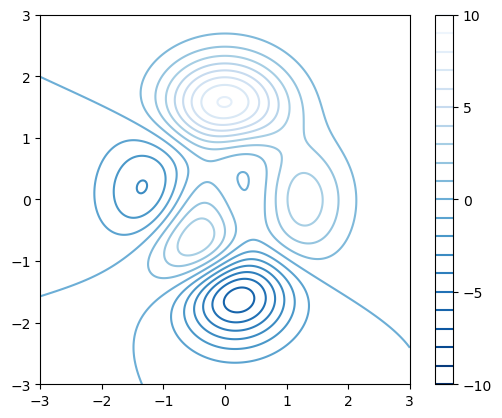

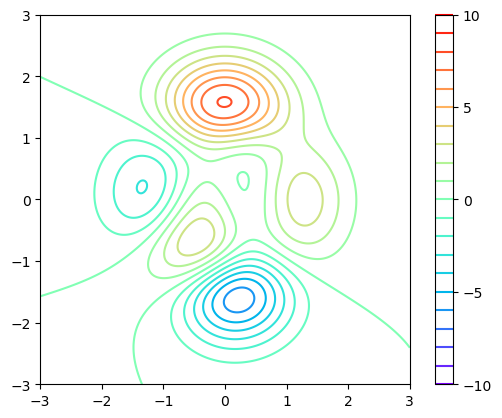

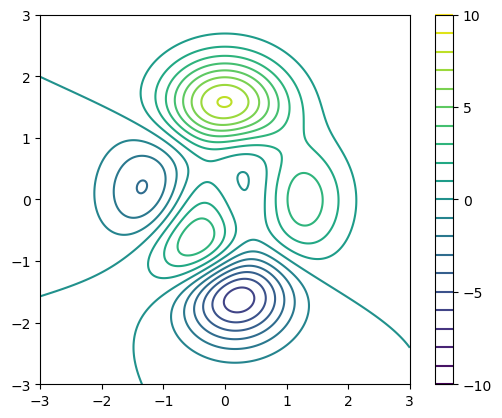

In [39]:
# 非填充
for cmap in cmap_arr:
    fig,ax=plt.subplots()
    bar=ax.contour(xx,yy,ff,levels=levels,cmap=cmap)

    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())

    cbar=plt.colorbar(bar,ax=ax)
    cbar.set_ticks([-10,-5,0,5,10])

    plt.gca().set_aspect('equal',adjustable='box')

    

### 可视化色谱在RGB色彩空间位置

In [66]:

plt.get_cmap('RdYlBu')
import matplotlib as mpl

RdYlBu=mpl.colormaps['RdYlBu']

color_code=RdYlBu(np.linspace(0,1,100))
print(color_code)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.63235757e-02 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.15808939e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.62132515e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.31617879e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.77941454e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.47426818e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.16912182e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.63235757e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.32721121e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.79044697e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 6.48530060e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.18015424e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.64339000e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 8.33824363e-01 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 8.80147939e-01 0.00000000e+00 1.000000

/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_2060/576133899.py:20: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0,1.0,1.0,0.0))
/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_2060/576133899.py:21: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.line.set_color((1.0,1.0,1.0,0.0))
/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_2060/576133899.py:22: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.line.set_color((1.0,1.0,1.0,0.0))


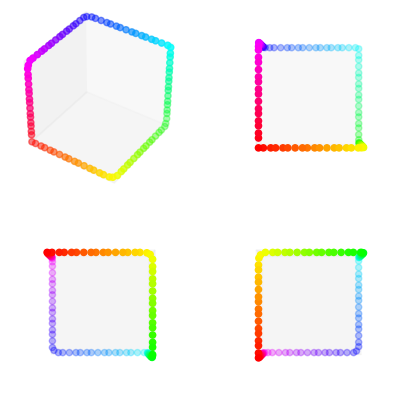

In [67]:
azim_array = [38, 0, -90, -90]
elev_array = [34, 0, 0,  90]

fig=plt.figure(figsize=(5,5))

for i,z in enumerate(zip(azim_array,elev_array),start=1):
    ax=fig.add_subplot(2,2,i,projection='3d')
    ax.scatter(color_code[:,0],color_code[:,1],color_code[:,2],c=color_code)
    

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)

    # 白色图脊
    ax.w_xaxis.line.set_color((1.0,1.0,1.0,0.0))
    ax.w_yaxis.line.set_color((1.0,1.0,1.0,0.0))
    ax.w_zaxis.line.set_color((1.0,1.0,1.0,0.0))

    # 白色背板
    # ax.w_xaxis.set_pane_color((1.0,1.0,1.0,0.0))
    # ax.w_yaxis.set_pane_color((1.0,1.0,1.0,0.0))
    # ax.w_zaxis.set_pane_color((1.0,1.0,1.0,0.0))
    
    plt.rcParams['grid.color']='k'
    ax.set_box_aspect(aspect=(1,1,1))
    ax.view_init(*z)
  

### 自定义色谱

In [30]:

def visualize_cm_in_RGB(continuous_cmap,fig_name,list_colors):
    azim_array = [38, 0, -90, -90]
    elev_array = [34, 0, 0,  90]

    color_codes=continuous_cmap(np.linspace(0,1,500))
    codes=[colors.to_rgb(idx) for idx in list_colors]
    fig=plt.figure(figsize=(6,6))
    for  idx,angles in enumerate(zip(azim_array,elev_array)):
        ax=fig.add_subplot(2,2,idx+1,projection='3d')     
        ax.scatter(color_codes[:,0],color_codes[:,1]
                   ,color_codes[:,2],c=color_codes,s=4,alpha=1)
        
        for color_idx in codes:
            ax.plot(color_idx[0],color_idx[1],color_idx[2]
                    ,marker='x',markersize=10,color='k')
        
        ax.set_xlabel('R')
        ax.set_ylabel('G')
        ax.set_zlabel('B')

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.set_zlim(0,1)

        ax.set_proj_type('ortho')
        plt.rcParams['grid.color']='k'
        ax.set_box_aspect(aspect=(1,1,1))
        ax.view_init(*angles)



darkblue=
#00008b
(0.0, 0.0, 0.5450980392156862)


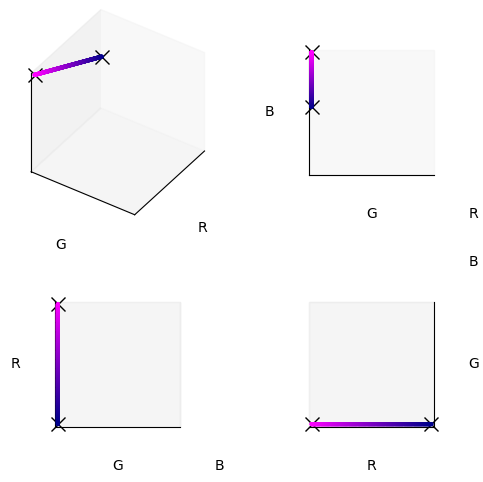

In [31]:
# 查看颜色名称RGB色号
print('darkblue=')
print(colors.to_hex('darkblue'))
print(colors.to_rgb('darkblue'))

list_node=[0.0,1.0]
list_colors=['darkblue','magenta']

two_nodes=LinearSegmentedColormap.from_list('two',list(zip(list_node,list_colors)))

visualize_cm_in_RGB(two_nodes,'x',list_colors)


### 自定义色谱绘制热图

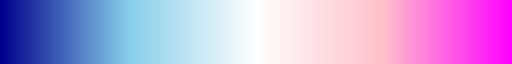

In [4]:
data=np.random.randn(20,20)
cmap=LinearSegmentedColormap.from_list('',['darkblue','skyblue','white','pink','magenta'])

cmap

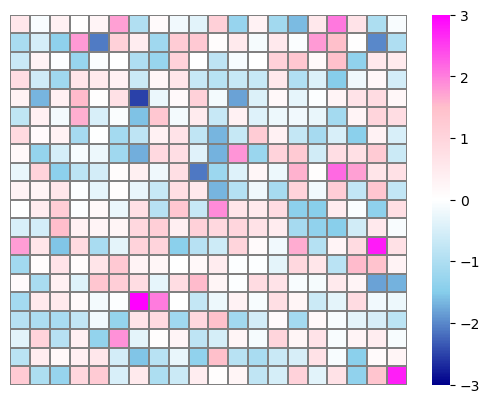

In [6]:
fig,ax=plt.subplots()

HM=sns.heatmap(data,ax=ax,
               vmin=-3, 
               vmax=3,
               cmap=cmap, # 指定色谱
               xticklabels=False,#轴刻度标签
               yticklabels=False,
               linecolor='grey',
               linewidths=0.1 
               )